# Prediction of Carbon Dioxide emission through linear regression using Scikit learn

1. Dataset related to fuel consumption and carbon dioxide emmision is used .
2. Dataset is split into training and testing sets.
3. Model is evaluated using traing dataset.
4. Finally model is used to predict unknown value of carbon dioxide emmision.

# Importing packages needed

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


# Understanding data

##  Fuelconsumption.csv :

We have downloaded dataset named "Fuelconsumption.csv" which contains fuel consumption ratings and estimated Carbon dioxide emmision values for new light-duty  vehicles for retail sale in Canada [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).
 These values are model specific.

- **MODELYEAR** e.g. 2014
- **MAKE**  e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

# Reading Data

In [21]:
df=pd.read_csv('FuelConsumption.csv')
df.head() # Top 5 entries will be shown


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Exploration

Lets first have a descriptive exploration on data.

In [22]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [23]:
cdf=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
5,6,3.5,230,10.0
6,6,3.5,232,10.1
7,6,3.7,255,11.1
8,6,3.7,267,11.6


Lets Plot these selected features

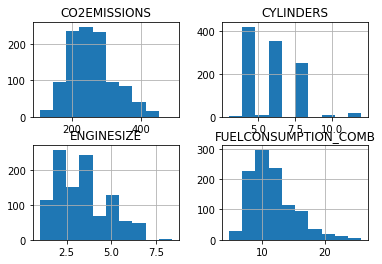

In [24]:
#viz=cdf[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
#viz.hist()
cdf.hist()
plt.show()

Lets plot each of these faetures versus emmision to see how linear is the relationship.

<function matplotlib.pyplot.show>

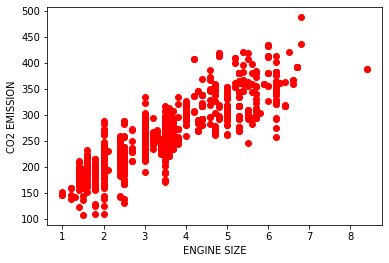

In [25]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.show

<function matplotlib.pyplot.show>

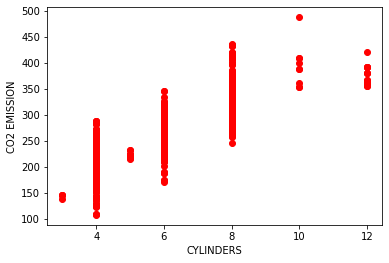

In [26]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSION')
plt.show

<function matplotlib.pyplot.show>

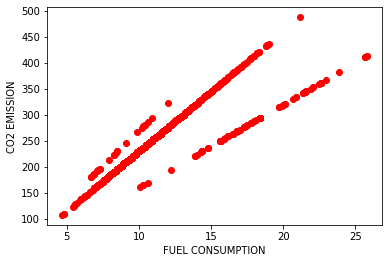

In [27]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='red')
plt.xlabel('FUEL CONSUMPTION')
plt.ylabel('CO2 EMISSION')
plt.show

# Splitting Dataset

 Train/test spliting involves splitting of dataset into training and testing sets which are mutally exclusive.Training set is used to train the model whereas as testing data set is used for testing.This spliting technique provides better out of sample accuracy.Since testing dataset is not a part of training dataset, it is more realistic for the real world applications.
 
Lets split dataset in to training and testing. 80% of total dataset is used for training and 20% of dataset is used for the
tesing.We create a mask to select random rows using **np.random.rand()** function.



In [0]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

# Simple Linear Regression Model

Linear Regression fits a model with cofficients $\theta =(\theta_1...\theta_n)$ to minimize the residual sum of squares between the independent variable x in the dataset and dependent y by linear approximation.

## Distributionof training data

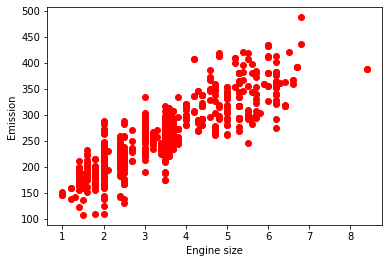

In [40]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Outline and Train Model 

Using Sklearn to model.

In [41]:
from sklearn import linear_model
reg_model=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg_model.fit(train_x,train_y)
print('Coefficients:', reg_model.coef_)
print('Intercept:',reg_model.intercept_ )

Coefficients: [[40.01187926]]
Intercept: [123.00056121]


__Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 

### Plotting Outputs

Text(0, 0.5, 'Emission')

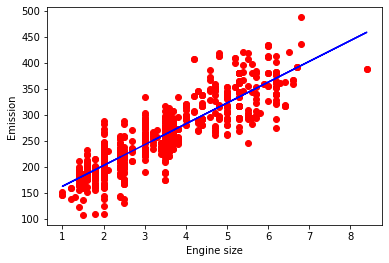

In [42]:
plt.scatter(train_x,train_y,color='red')
plt.plot(train_x,reg_model.coef_[0][0]*train_x+reg_model.intercept_[0],'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")


# Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [43]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat=reg_model.predict(test_x)

print("Mean Absolute Error : %.2f " % np.mean(np.absolute(test_y_hat-test_y)))
print("Residual Sum of Squares : %.2f " % np.mean((test_y_hat-test_y)**2))
print("R2-Score : % .2f" % r2_score(test_y_hat,test_y))

Mean Absolute Error : 23.19 
Residual Sum of Squares : 947.60 
R2-Score :  0.69
